In [1]:
import pandas as pd

In [2]:
# Load the CSV file
file_path = 'marvel_movies_processed.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,Movie Name,Release Date,Director,Writers,Rating,Run Time,Characters
0,0,thor,"May 6, 2011",Kenneth Branagh,"Ashley Miller, Zack Stentz, Don Payne",PG-13,115 min,"Thor, Odin, Heimdall, Loki, Doctor Erik Selvig..."
1,1,iron-man-2,"May 7, 2010",Jon Favreau,Justin Theroux,PG-13,124 min,"Iron Man, War Machine, Black Widow"
2,2,the-incredible-hulk,"June 13, 2008",Louis Leterrier,Zak Penn,PG-13,112 min,"Hulk, Abomination"
3,3,iron-man,"May 2, 2008",Jon Favreau,"Mark Fergus, Hawk Ostby, Art Marcum, Matt Holl...",PG-13,126 min,"Iron Man, War Machine"
4,4,the-marvels,"November 10, 2023",Nia DaCosta,NaN,NaN,NaN,"Captain Marvel, Monica Rambeau, Ms. Marvel, Ni..."


In [3]:
# Display basic information about the dataframe
data.info()

# Display the first few rows of the dataframe
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    33 non-null     int64 
 1   Movie Name    33 non-null     object
 2   Release Date  33 non-null     object
 3   Director      32 non-null     object
 4   Writers       22 non-null     object
 5   Rating        20 non-null     object
 6   Run Time      20 non-null     object
 7   Characters    33 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.2+ KB


,Unnamed: 0,Movie Name,Release Date,Director,Writers,Rating,Run Time,Characters
0,0,thor,"May 6, 2011",Kenneth Branagh,"Ashley Miller, Zack Stentz, Don Payne",PG-13,115 min,"Thor, Odin, Heimdall, Loki, Doctor Erik Selvig..."
1,1,iron-man-2,"May 7, 2010",Jon Favreau,Justin Theroux,PG-13,124 min,"Iron Man, War Machine, Black Widow"
2,2,the-incredible-hulk,"June 13, 2008",Louis Leterrier,Zak Penn,PG-13,112 min,"Hulk, Abomination"
3,3,iron-man,"May 2, 2008",Jon Favreau,"Mark Fergus, Hawk Ostby, Art Marcum, Matt Holl...",PG-13,126 min,"Iron Man, War Machine"
4,4,the-marvels,"November 10, 2023",Nia DaCosta,NaN,NaN,NaN,"Captain Marvel, Monica Rambeau, Ms. Marvel, Ni..."


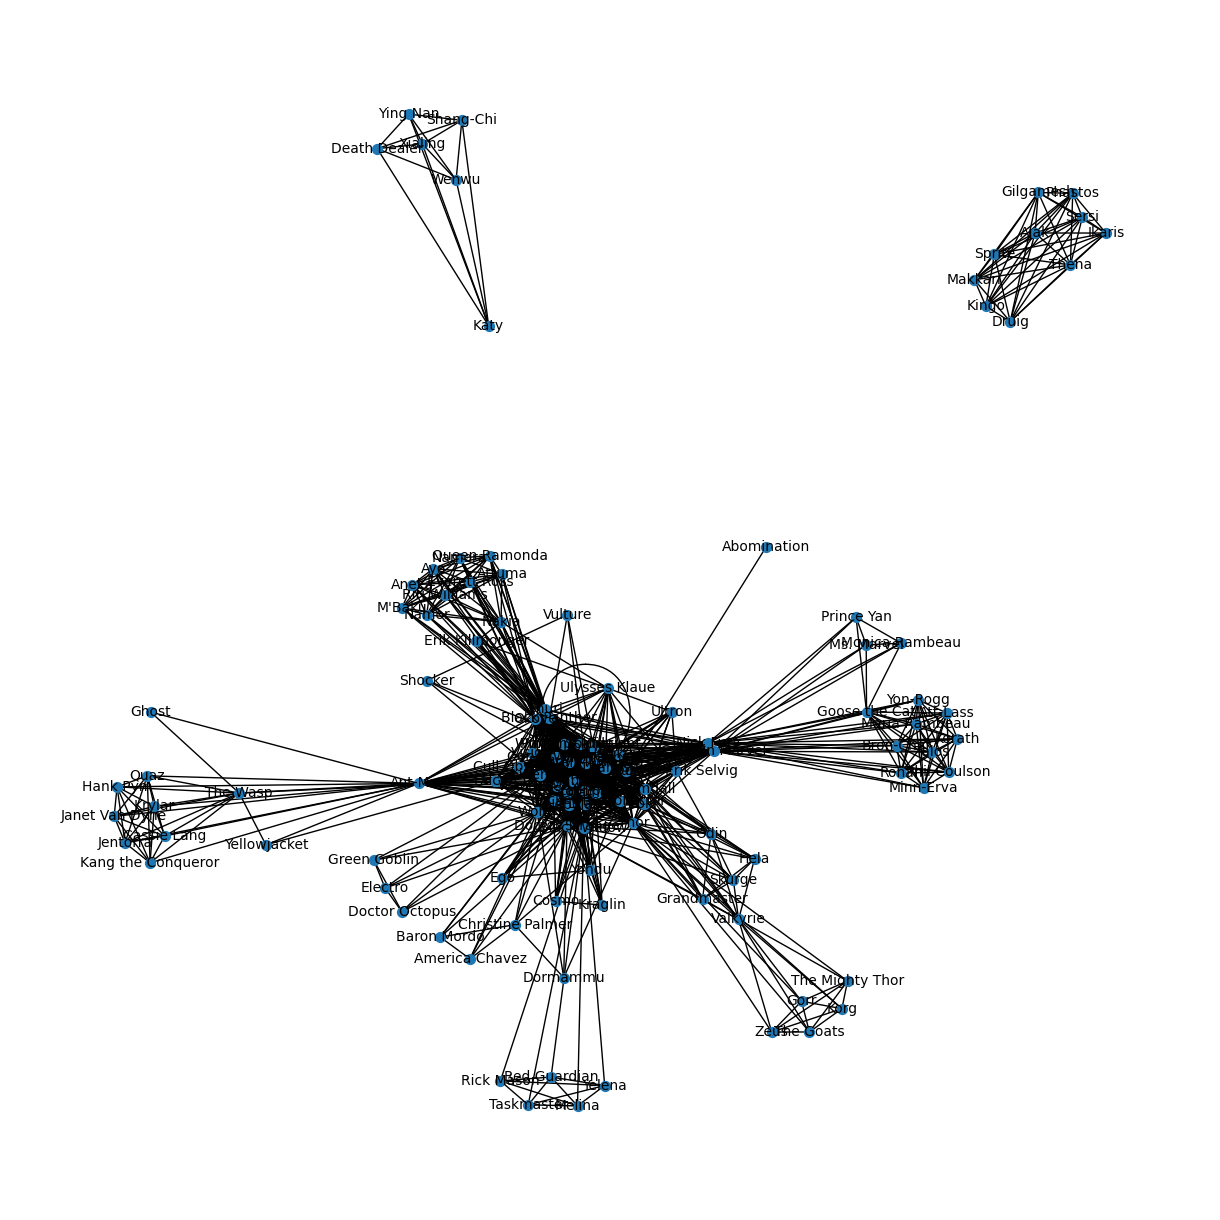

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Iterate over each movie to add edges between characters
for index, row in data.iterrows():
    movie_characters = row['Characters'].split(', ')  # Adjust this split if characters are stored differently
    for i, char1 in enumerate(movie_characters):
        for char2 in movie_characters[i + 1:]:
            if G.has_edge(char1, char2):
                G[char1][char2]['weight'] += 1
            else:
                G.add_edge(char1, char2, weight=1)

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10)
plt.show()

In [5]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Display top 10 characters by degree centrality
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Community detection using the Girvan-Newman method
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
top_level_communities = next(communities)
sorted(map(sorted, top_level_communities))

[['Abomination'],
 ['Ajak',
  'Druig',
  'Gilgamesh',
  'Ikaris',
  'Kingo',
  'Makkari',
  'Phastos',
  'Sersi',
  'Sprite',
  'Thena'],
 ['America Chavez',
  'Aneka',
  'Ant-Man',
  'Att-Lass',
  'Attuma',
  'Ayo',
  'Baron Mordo',
  'Black Panther',
  'Black Widow',
  'Bron-Char',
  'Captain America',
  'Captain Marvel',
  'Cassie Lang',
  'Christine Palmer',
  'Corvus Glaive',
  'Cosmo',
  'Cull Obsidian',
  'Doctor Erik Selvig',
  'Doctor Octopus',
  'Doctor Strange',
  'Dormammu',
  'Drax',
  'Ebony Maw',
  'Ego',
  'Electro',
  'Erik Killmonger',
  'Everett Ross',
  'Falcon',
  'Gamora',
  'Ghost',
  'Goose the Cat',
  'Gorr',
  'Grandmaster',
  'Green Goblin',
  'Groot',
  'Hank Pym',
  'Hawkeye',
  'Heimdall',
  'Hela',
  'Hulk',
  'Iron Man',
  'Janet Van Dyne',
  'Jentorra',
  'Kang the Conqueror',
  'Korath',
  'Korg',
  'Kraglin',
  'Krylar',
  'Loki',
  "M'Baku",
  'Mantis',
  'Maria Rambeau',
  'Melina',
  'Minn-Erva',
  'Monica Rambeau',
  'Ms. Marvel',
  'Nakia',
  'Na

In [6]:
# Create a dataset with network features
features = []
for node in G.nodes():
    features.append([
        node,
        degree_centrality[node],
        betweenness_centrality[node],
        closeness_centrality[node],
        G.degree(node)
    ])

# Convert to DataFrame
features_df = pd.DataFrame(features, columns=['Character', 'DegreeCentrality', 'BetweennessCentrality', 'ClosenessCentrality', 'Degree'])

# Display the features DataFrame
print(features_df.head())

            Character  DegreeCentrality  BetweennessCentrality  \
0                Thor          0.422414               0.091273   
1                Odin          0.103448               0.000363   
2            Heimdall          0.318966               0.008269   
3                Loki          0.301724               0.006985   
4  Doctor Erik Selvig          0.129310               0.000359   

   ClosenessCentrality  Degree  
0             0.570907      49  
1             0.371581      12  
2             0.463478      37  
3             0.458547      35  
4             0.386578      15  


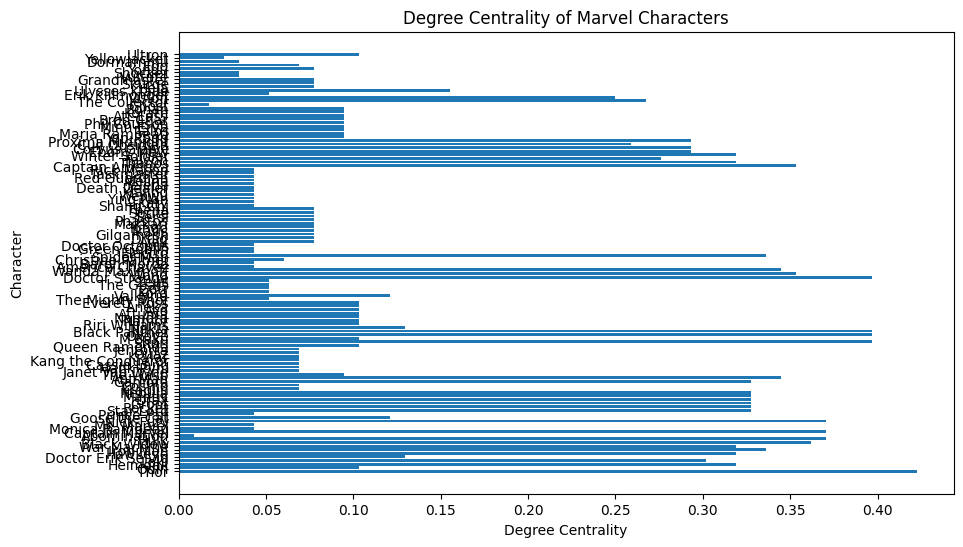

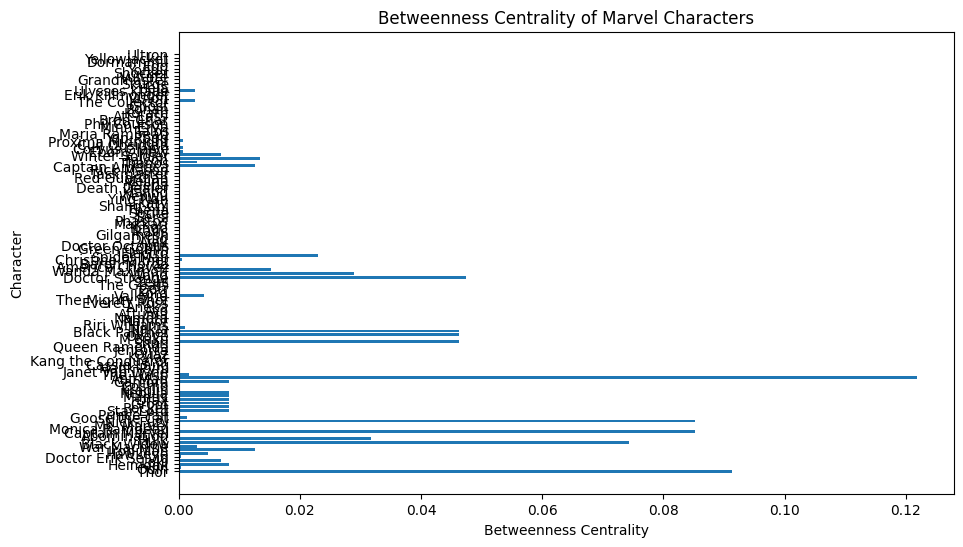

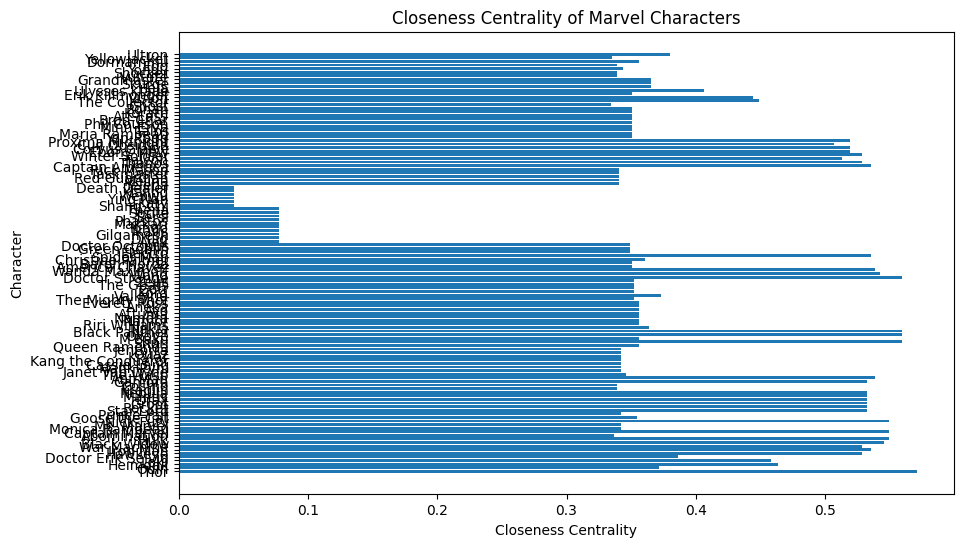

In [7]:
import matplotlib.pyplot as plt

# Visualize the centrality measures
plt.figure(figsize=(10, 6))
plt.barh(features_df['Character'], features_df['DegreeCentrality'])
plt.xlabel('Degree Centrality')
plt.ylabel('Character')
plt.title('Degree Centrality of Marvel Characters')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(features_df['Character'], features_df['BetweennessCentrality'])
plt.xlabel('Betweenness Centrality')
plt.ylabel('Character')
plt.title('Betweenness Centrality of Marvel Characters')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(features_df['Character'], features_df['ClosenessCentrality'])
plt.xlabel('Closeness Centrality')
plt.ylabel('Character')
plt.title('Closeness Centrality of Marvel Characters')
plt.show()

In [8]:
from pyvis.network import Network

# Initialize Pyvis network
net = Network(notebook=True)

# Add nodes and edges to the Pyvis network
for node in G.nodes():
    net.add_node(node, label=node)

for edge in G.edges(data=True):
    net.add_edge(edge[0], edge[1], value=edge[2]['weight'])

# Display the network
net.show('marvel_network.html')

marvel_network.html
